### Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

### Load dataset and explare the dataset

In [3]:
data = pd.read_excel("dataset_mp3/NIR_Data.xlsx")
data.head()

,Sample ID,Unnamed: 1,11988.51,11980.8,11973.08,11965.37,11957.66,11949.94,11942.23,11934.51,...,4057.888,4050.173,4042.459,4034.744,4027.03,4019.315,4011.601,4003.886,3996.171,Moisture
0,3001RanBioMixMalarenergi.0,1,0.430391,0.430351,0.430570,0.430974,0.431129,0.430807,0.430425,0.430264,...,1.042346,1.052940,1.062511,1.070474,1.077419,1.082571,1.084933,1.086961,1.088756,24.933532
1,3001RanBioMixMalarenergi.1,2,0.418378,0.418387,0.418783,0.418983,0.418721,0.418339,0.417951,0.417494,...,1.017335,1.027128,1.036592,1.043992,1.049032,1.051711,1.052812,1.054065,1.055364,24.933532
2,3001RanBioMixMalarenergi.2,3,0.446782,0.446930,0.446840,0.446419,0.446009,0.445715,0.445539,0.445537,...,1.053265,1.061849,1.070649,1.079960,1.088810,1.094708,1.098719,1.100796,1.099144,24.933532
3,3001RanBioMixMalarenergi.3,4,0.434038,0.433805,0.433692,0.433850,0.433912,0.433757,0.433515,0.433327,...,1.020629,1.029372,1.038613,1.047470,1.053009,1.054695,1.054589,1.053924,1.053708,24.933532
4,3001RanBioMixMalarenergi.4,5,0.451491,0.451441,0.451692,0.451816,0.451755,0.451595,0.451293,0.451114,...,1.013404,1.023107,1.030855,1.036464,1.042622,1.049984,1.055300,1.055122,1.052386,24.933532


In [4]:
data.drop(columns=["Unnamed: 1"], axis=1, inplace=True)
data.set_index("Sample ID", inplace=True)

In [5]:
data.head()

,11988.51,11980.8,11973.08,11965.37,11957.66,11949.94,11942.23,11934.51,11926.8,11919.08,...,4057.888,4050.173,4042.459,4034.744,4027.03,4019.315,4011.601,4003.886,3996.171,Moisture
Sample ID,,,,,,,,,,,,,,,,,,,,,
3001RanBioMixMalarenergi.0,0.430391,0.430351,0.430570,0.430974,0.431129,0.430807,0.430425,0.430264,0.430107,0.429995,...,1.042346,1.052940,1.062511,1.070474,1.077419,1.082571,1.084933,1.086961,1.088756,24.933532
3001RanBioMixMalarenergi.1,0.418378,0.418387,0.418783,0.418983,0.418721,0.418339,0.417951,0.417494,0.417289,0.417323,...,1.017335,1.027128,1.036592,1.043992,1.049032,1.051711,1.052812,1.054065,1.055364,24.933532
3001RanBioMixMalarenergi.2,0.446782,0.446930,0.446840,0.446419,0.446009,0.445715,0.445539,0.445537,0.445626,0.445764,...,1.053265,1.061849,1.070649,1.079960,1.088810,1.094708,1.098719,1.100796,1.099144,24.933532
3001RanBioMixMalarenergi.3,0.434038,0.433805,0.433692,0.433850,0.433912,0.433757,0.433515,0.433327,0.433325,0.433319,...,1.020629,1.029372,1.038613,1.047470,1.053009,1.054695,1.054589,1.053924,1.053708,24.933532
3001RanBioMixMalarenergi.4,0.451491,0.451441,0.451692,0.451816,0.451755,0.451595,0.451293,0.451114,0.451393,0.452077,...,1.013404,1.023107,1.030855,1.036464,1.042622,1.049984,1.055300,1.055122,1.052386,24.933532


In [6]:
print("Dataset shape:", data.shape)

Dataset shape: (773, 1038)


In [7]:
data["Moisture"]

Sample ID
3001RanBioMixMalarenergi.0    24.933532
3001RanBioMixMalarenergi.1    24.933532
3001RanBioMixMalarenergi.2    24.933532
3001RanBioMixMalarenergi.3    24.933532
3001RanBioMixMalarenergi.4    24.933532
                                ...    
3154RanBioMixMalarenergi.1    39.039775
3154RanBioMixMalarenergi.2    39.039775
3154RanBioMixMalarenergi.3    39.039775
3154RanBioMixMalarenergi.4    39.039775
3154RanBioMixMalarenergi.5    39.039775
Name: Moisture, Length: 773, dtype: float64

**Check for missing values**

In [8]:
data.isna().sum()

11988.51    0
11980.8     0
11973.08    0
11965.37    0
11957.66    0
           ..
4019.315    0
4011.601    0
4003.886    0
3996.171    0
Moisture    0
Length: 1038, dtype: int64

In [9]:
data.isna().sum().sum()

0

**Check if all columns are numeric**

In [10]:
numeric_columns = data.select_dtypes(include='number').columns
all_numeric = len(numeric_columns) == data.shape[1]

print("All features are numeric:", all_numeric)

All features are numeric: True


**Plot example spectra**

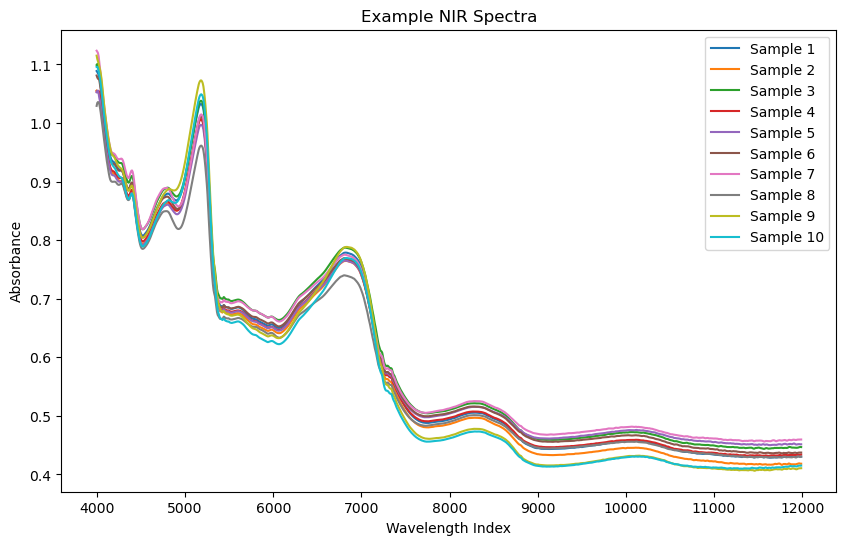

In [11]:
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot first 10 spectra
    plt.plot(data.iloc[i, :-1], label=f'Sample {i+1}')
plt.title('Example NIR Spectra')
plt.xlabel('Wavelength Index')
plt.ylabel('Absorbance')
plt.legend()
plt.show()

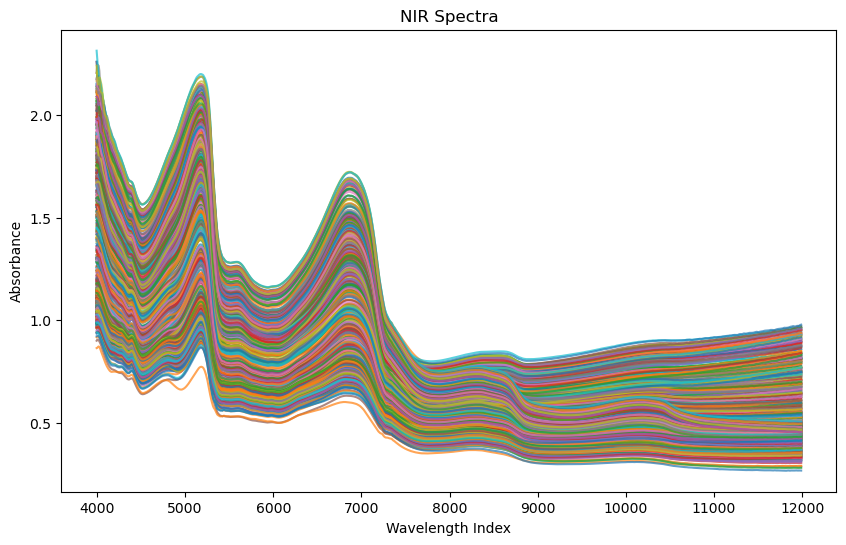

In [12]:
plt.figure(figsize=(10, 6))
for i in range(len(data)):  # Plot all spectra
    plt.plot(data.iloc[i, :-1], alpha=0.7)
plt.title('NIR Spectra')
plt.xlabel('Wavelength Index')
plt.ylabel('Absorbance')
plt.show()

**Check for outliers in the target variable (moisture)**

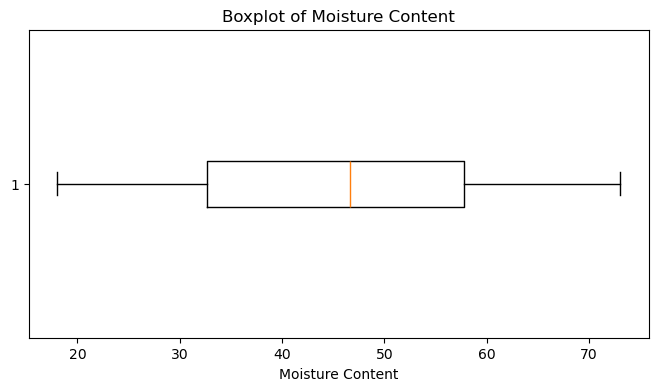

In [13]:
plt.figure(figsize=(8, 4))
plt.boxplot(data.iloc[:, -1], vert=False)
plt.title('Boxplot of Moisture Content')
plt.xlabel('Moisture Content')
plt.show()

**Separate features and target**

In [14]:
X = data.iloc[:, :-1].values  # features
y = data.iloc[:, -1].values  # data["Moisture"]


### Define Preprocessing Functions

In [15]:

def apply_savgol_smoothing(X_train, X_test, window_length=11, polyorder=2):
    """Apply Savitzky-Golay smoothing to training and test data."""
    X_train_smoothed = savgol_filter(X_train, window_length, polyorder, axis=1)
    X_test_smoothed = savgol_filter(X_test, window_length, polyorder, axis=1)
    return X_train_smoothed, X_test_smoothed

def apply_savgol_derivative(X_train, X_test, window_length=11, polyorder=2, deriv=1):
    """Apply Savitzky-Golay first derivative to training and test data."""
    X_train_derivative = savgol_filter(X_train, window_length, polyorder, deriv=deriv, axis=1)
    X_test_derivative = savgol_filter(X_test, window_length, polyorder, deriv=deriv, axis=1)
    return X_train_derivative, X_test_derivative

def apply_msc(X_train, X_test):
    """Apply Multiplicative Scatter Correction to training and test data."""
    mean_spectrum = np.mean(X_train, axis=0)
    X_train_corrected = (X_train - np.mean(X_train, axis=1, keepdims=True)) / (mean_spectrum + 1e-8)
    X_test_corrected = (X_test - np.mean(X_test, axis=1, keepdims=True)) / (mean_spectrum + 1e-8)
    return X_train_corrected, X_test_corrected

def apply_snv(X_train, X_test):
    """Apply Standard Normal Variate to training and test data."""
    X_train_snv = (X_train - np.mean(X_train, axis=1, keepdims=True)) / (np.std(X_train, axis=1, keepdims=True) + 1e-8)
    X_test_snv = (X_test - np.mean(X_test, axis=1, keepdims=True)) / (np.std(X_test, axis=1, keepdims=True) + 1e-8)
    return X_train_snv, X_test_snv

def apply_sample_normalization(X_train, X_test):
    """Apply sample normalization to training and test data."""
    X_train_normalized = X_train / np.linalg.norm(X_train, axis=1, keepdims=True)
    X_test_normalized = X_test / np.linalg.norm(X_test, axis=1, keepdims=True)
    return X_train_normalized, X_test_normalized

def combined_preprocessing(X_train, X_test, methods):
    """Apply a sequence of preprocessing methods to training and test data."""
    for method in methods:
        X_train, X_test = method(X_train, X_test)
    return X_train, X_test

### Define Evaluation Functions

In [16]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Train a model and evaluate its performance."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2
    
def compute_rmsecv(model, X, y, cv=5):
    """Compute RMSECV using K-fold cross-validation."""
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    rmse_scores = []
    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        # Apply preprocessing within each fold
        X_train_fold, X_val_fold = combined_preprocessing(X_train_fold, X_val_fold, preproc_methods)

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred)))
    return np.mean(rmse_scores)


### Define Preprocessing Combinations and Models

**Define all preprocessing combinations**

In [17]:
preprocessing_combinations = {
        "Raw Data": [],
        "SG Smoothing": [apply_savgol_smoothing],
        "SG 1st Derivative": [apply_savgol_derivative],
        "MSC": [apply_msc],
        "SNV": [apply_snv],
        "Sample Normalization": [apply_sample_normalization],
        "MSC + SG Smoothing": [apply_msc, apply_savgol_smoothing],
        "SNV + SG Smoothing": [apply_snv, apply_savgol_smoothing],
        "MSC + SG 1st Derivative": [apply_msc, apply_savgol_derivative],
        "SNV + SG 1st Derivative": [apply_snv, apply_savgol_derivative],
        "MSC + Normalization": [apply_msc, apply_sample_normalization],
        "SNV + Normalization": [apply_snv, apply_sample_normalization],
        "MSC + SG Smoothing + Normalization": [
            apply_msc, apply_savgol_smoothing, apply_sample_normalization
        ],
        "SNV + SG 1st Derivative + Normalization": [
            apply_snv, apply_savgol_derivative, apply_sample_normalization
        ],
        "SNV + SG Smoothing + Normalization": [
            apply_snv, apply_savgol_smoothing, apply_sample_normalization
        ],
        "MSC + SG 1st Derivative + Normalization": [
            apply_msc, apply_savgol_derivative, apply_sample_normalization
        ]
}

**Define models**

In [18]:
models = {
    "PLS": PLSRegression(n_components=10),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.01),
    "ANN": MLPRegressor(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        max_iter=2000,
        learning_rate_init=0.001,
        early_stopping=True,
        solver='adam'
    )
}

### Train and Evaluate Models

!! This code will take approximately 6 to 12 minutes to complete its execution. Please be patient while it runs.😊

In [19]:
results = []
import time
import math
    
start = time.time()

# Train & evaluate all models with different preprocessing
for preproc_name, preproc_methods in preprocessing_combinations.items():
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply preprocessing to training and testing sets
    X_train_processed, X_test_processed = combined_preprocessing(X_train, X_test, preproc_methods)

    # Train and evaluate each model
    for model_name, model in models.items():
        r2 = evaluate_model(model, X_train_processed, X_test_processed, y_train, y_test)
        rmsecv = compute_rmsecv(model, X_train_processed, y_train)
        results.append((preproc_name, model_name, r2, rmsecv))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Preprocessing", "Model", "R2", "RMSECV"])

end = time.time()
print(f"{math.ceil((end - start)/60)} Minutes")

5 Minutes


In [20]:
# Filter results for each model
pls_results = results_df[results_df["Model"] == "PLS"].round(4)
svr_results = results_df[results_df["Model"] == "SVR"].round(4)
ann_results = results_df[results_df["Model"] == "ANN"].round(4)

**Print results for each model**

In [21]:
print("PLS Results:")
pls_results

PLS Results:


,Preprocessing,Model,R2,RMSECV
0,Raw Data,PLS,0.9524,3.1918
3,SG Smoothing,PLS,0.9524,3.1989
6,SG 1st Derivative,PLS,0.9585,3.0884
9,MSC,PLS,0.9541,3.0202
12,SNV,PLS,0.9699,2.5356
15,Sample Normalization,PLS,0.9528,2.7599
18,MSC + SG Smoothing,PLS,0.9540,3.0443
21,SNV + SG Smoothing,PLS,0.9694,2.5399
24,MSC + SG 1st Derivative,PLS,0.9592,3.1783
27,SNV + SG 1st Derivative,PLS,0.9729,2.8707


In [22]:
print("\nSVR Results:")
svr_results


SVR Results:


,Preprocessing,Model,R2,RMSECV
1,Raw Data,SVR,0.9305,3.8131
4,SG Smoothing,SVR,0.9305,3.8141
7,SG 1st Derivative,SVR,0.3359,14.5186
10,MSC,SVR,0.9339,2.8402
13,SNV,SVR,0.9660,2.5709
16,Sample Normalization,SVR,0.1334,13.7271
19,MSC + SG Smoothing,SVR,0.9339,4.6549
22,SNV + SG Smoothing,SVR,0.9659,2.5731
25,MSC + SG 1st Derivative,SVR,0.2635,3.8856
28,SNV + SG 1st Derivative,SVR,0.8326,3.3948


In [23]:

print("\nANN Results:")
ann_results


ANN Results:


,Preprocessing,Model,R2,RMSECV
2,Raw Data,ANN,0.7913,5.4258
5,SG Smoothing,ANN,0.8678,5.6119
8,SG 1st Derivative,ANN,0.8959,9.9917
11,MSC,ANN,0.8580,5.6260
14,SNV,ANN,0.9219,3.7397
17,Sample Normalization,ANN,-0.0958,7.7567
20,MSC + SG Smoothing,ANN,0.9282,5.8364
23,SNV + SG Smoothing,ANN,0.9225,3.7221
26,MSC + SG 1st Derivative,ANN,0.8901,4.7559
29,SNV + SG 1st Derivative,ANN,0.9317,2.9094


In [24]:
results_df["Preprocessing"] = results_df["Preprocessing"].replace({
    "MSC + SG Smoothing + Normalization": "MSC+SG+Norm",
    "MSC + SG 1st Derivative + Normalization": "MSC+SG1+Norm",
    "SNV + SG Smoothing + Normalization": "SNV+SG+Norm",
    "SNV + SG 1st Derivative + Normalization": "SNV+SG1+Norm",
    "SG Smoothing": "SG",
    "SG 1st Derivative": "SG1",
    "Sample Normalization":"Norm",
    "MSC + SG Smoothing": "MSC+SG",
    "SNV + SG Smoothing": "SNV+SG",
    "MSC + SG 1st Derivative": "MSC+SG1",
    "SNV + SG 1st Derivative": "SNV+SG1",
    "MSC + Normalization": "MSC+Norm",
    "SNV + Normalization": "SNV+Norm",
})

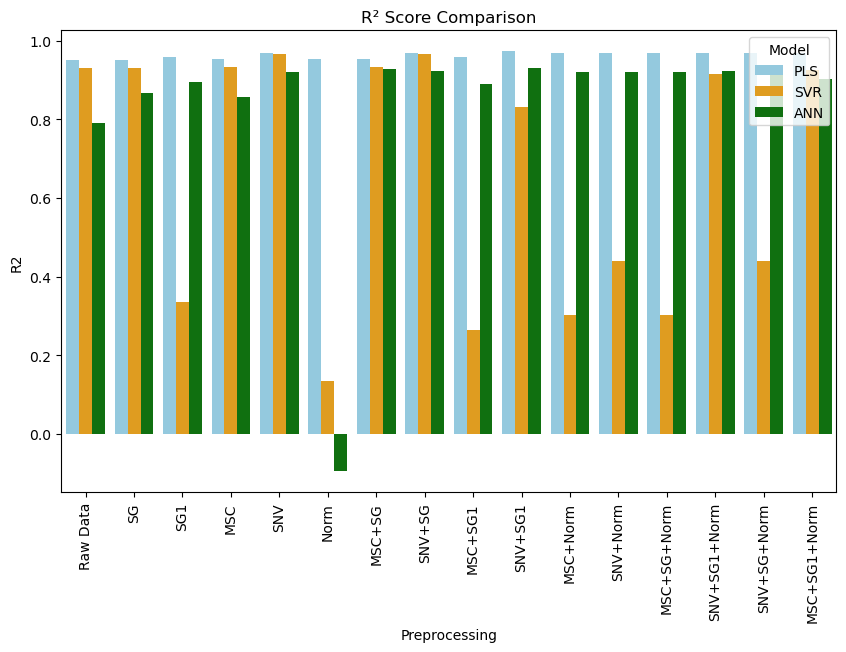

In [25]:
import seaborn as sns
colors = ["skyblue", "orange", "green"]

# Plot R² scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Preprocessing", y="R2", hue="Model", palette=colors)
plt.title("R² Score Comparison")
plt.xticks(rotation=90)
plt.show()



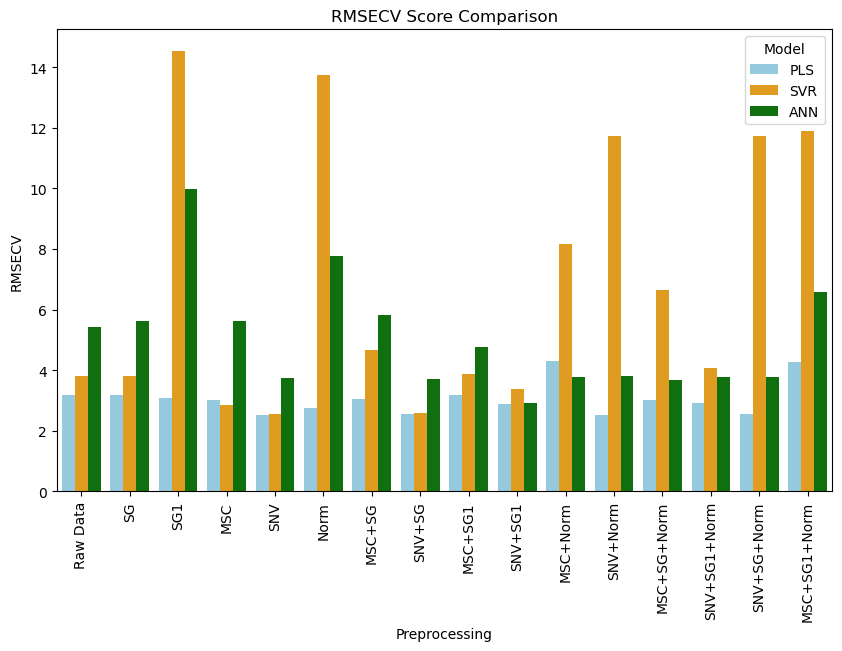

In [26]:
# Plot RMSECV scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Preprocessing", y="RMSECV", hue="Model", palette=colors)
plt.title("RMSECV Score Comparison")
plt.xticks(rotation=90)
plt.show()